## Семинар 2 "Распознавание рукописных цифр"

ФИО: Курбанов Ринат Фирдусович

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [3]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    print(X.shape)
    print(y)
    break

(32, 784)
[5 8 3 6 9 2 2 6 6 6 5 5 1 4 4 3 1 1 4 5 5 0 0 7 4 4 1 2 6 3 7 7]


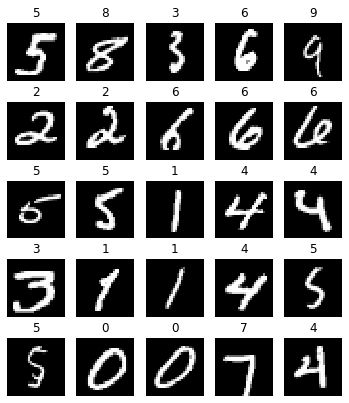

In [4]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [5]:
#activation = ReLU()
activation = Sigmoid()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(10000):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()

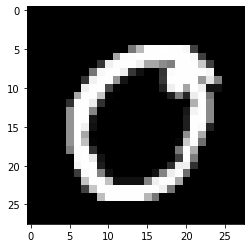

In [6]:
for X, y in train_loader:
    X = X.numpy()
    break
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.Greys_r)

In [7]:
x = net.forward(X[0].reshape(1, -1))[0]
order = np.argsort(x)[::-1]
print(order, x[order])

[7 0 1 5 9 2 3 4 6 8] [ 0.02854817  0.0273539   0.00627727  0.0044873  -0.01090325 -0.01185707
 -0.02606502 -0.02676333 -0.03476216 -0.06912188]


In [ ]:
losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

In [ ]:
plt.plot(losses)
plt.plot(sigm_losses)
plt.plot(good_relu_losses)
plt.show()

In [23]:
good_relu_losses = losses

In [24]:
print(l)

1.6288843277651752


### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [26]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = (X > 0).astype(float)*X
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (self.s > 0).astype(float)*dLdy
    
    def step(self, learning_rate):
        pass

In [27]:
x = np.array([1, 2])
(x > 1.5).astype(float)

array([0., 1.])

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

In [28]:
errors = []

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    
    for x_i, y_i in zip(X, y):
        l = loss.forward(x_i.reshape(1, -1), y_i.reshape(1, -1))
        errors.append((l, x_i.reshape(28, 28)))
    
    if len(errors) > 1000:
        break

In [29]:
errors.sort(key=lambda x: x[0], reverse=True)

In [30]:
print(errors[18][1])

[[-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421

  -0.42421296 -0.42421296 -0.42421296 -0.42421296]]


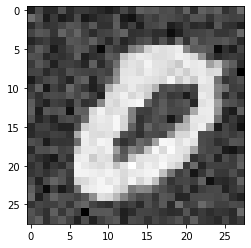

In [34]:
img = np.copy(errors[10][1])
img += np.random.randn(28*28).reshape(28, 28)*0.32
plt.imshow(img, cmap=plt.cm.Greys_r)
#print(errors[1000][0])

In [3]:
np.random.randn(28*28).reshape(28, 28)*0.32

array([[ 3.99806990e-01, -1.97164985e-01, -2.97972735e-01,
        -5.99012918e-01,  1.37054778e-01, -3.31275623e-01,
         3.05343858e-01, -2.70517270e-01, -3.84420540e-01,
         3.07777682e-01,  7.27364381e-01,  3.81345668e-01,
         5.44370418e-02,  7.73363919e-02, -6.13136105e-02,
        -9.34596867e-01, -1.78384723e-01,  1.41598970e-03,
        -1.85907451e-01, -8.94521225e-02, -8.50541008e-03,
        -3.51049490e-01,  2.17239745e-01,  4.46790233e-01,
         2.66354735e-01,  2.92161478e-02, -9.25500299e-02,
        -1.19264653e-01],
       [ 1.36025821e-02, -2.93371962e-01, -1.05131399e-01,
         2.41426350e-01, -3.57884947e-01, -8.87167512e-02,
        -8.33353636e-02, -2.08778212e-01,  1.15174805e-01,
        -2.17197841e-01, -1.06485054e-01,  6.94322084e-02,
        -2.30878600e-01, -2.08114929e-01,  1.42576409e-01,
         1.28513813e-02,  2.13779916e-01, -3.95090724e-01,
         3.13210542e-02,  1.16301053e-01,  2.95332766e-01,
        -1.17910866e-02, -2.08

### HW1 (1 балл): Реализовать Tanh

In [32]:
class Tanh:
    
    def __init__(self):
        pass

    def forward(self, X):
        self.X = X
        return np.tanh(X)
    
    def backward(self, dLdy):
         return dLdy*(1 / (np.cosh(self.X) ** 2))

    def step(self, learning_rate):
        pass

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?